In [1]:
from zipfile import ZipFile
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np
nltk.download('vader_lexicon')
zf = ZipFile('ufo-sightings-transformed.csv.zip')
ufo = pd.read_csv(zf.open('ufo-sightings-transformed.csv'))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Ele\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
sia = SentimentIntensityAnalyzer()
ufo['Sentiment'] = ufo['Description'].astype(str).apply(lambda s: sia.polarity_scores(s)['compound'])


In [3]:
def sentiment(value):
    if value > 0:
        return 'Positive'
    if value == 0:
        return 'Neutral'
    if value < 0:
        return 'Negative'
ufo['Sentiment'] = ufo['Sentiment'].agg(sentiment)
ufo.head()

C:\Users\Ele\AppData\Local\Temp\ipykernel_11308\4095784406.py:8: FutureWarning: using <function sentiment at 0x000001A95F6ADBC0> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  ufo['Sentiment'] = ufo['Sentiment'].agg(sentiment)


,Unnamed: 0,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description,Sentiment
0,0,1949-10-10 20:30:00,4/27/2004,1949,10,20,Autumn,USA,United States,Texas,San Marcos,29.883056,-97.941111,Cylinder,2700.0,45 minutes,This event took place in early fall around 194...,Neutral
1,1,1949-10-10 21:00:00,12/16/2005,1949,10,21,Autumn,USA,United States,Texas,Bexar County,29.384210,-98.581082,Light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,Positive
2,2,1955-10-10 17:00:00,1/21/2008,1955,10,17,Autumn,GBR,United Kingdom,England,Chester,53.200000,-2.916667,Circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,Neutral
3,3,1956-10-10 21:00:00,1/17/2004,1956,10,21,Autumn,USA,United States,Texas,Edna,28.978333,-96.645833,Circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,Neutral
4,4,1960-10-10 20:00:00,1/22/2004,1960,10,20,Autumn,USA,United States,Hawaii,Kaneohe,21.418056,-157.803611,Light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,Neutral


In [4]:
yr_stm = ufo.groupby('Year')['Sentiment'].agg([lambda x: (x == 'Positive').mean(), lambda y: (y == 'Neutral').mean(), lambda z: (z == 'Negative').mean()]).reset_index()
yr_stm = yr_stm.rename(columns={'<lambda_0>': 'Positive', '<lambda_1>': 'Neutral', '<lambda_2>': 'Negative'})

Text(0.5, 1.0, 'Sentiment Proportion of People Who Witness UFOs Per Year')

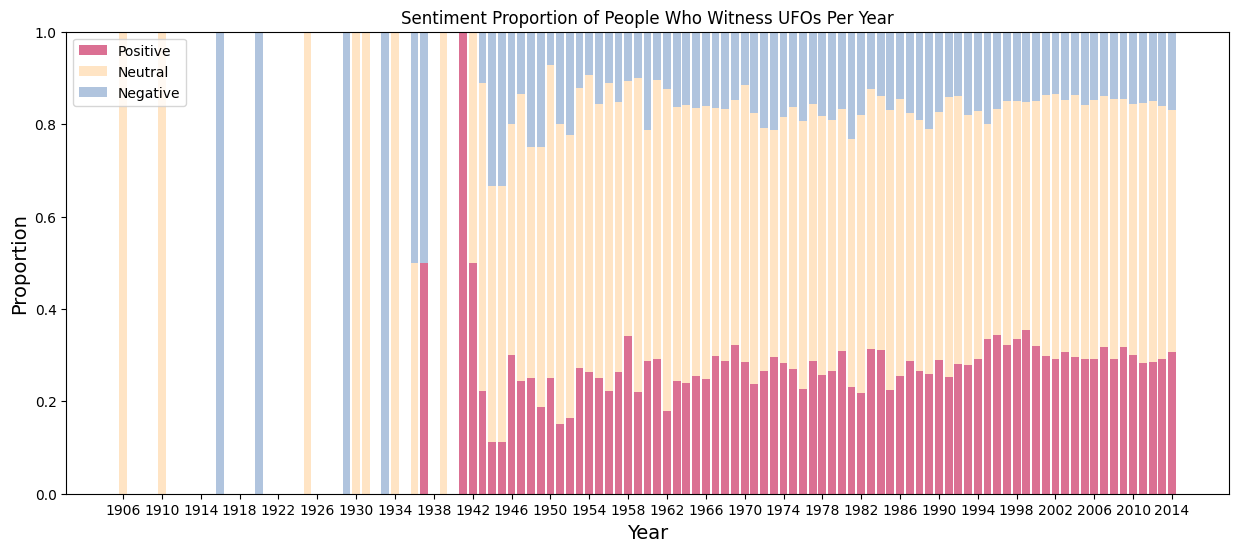

In [5]:
plt.figure(figsize=(15,6))
plt.bar(yr_stm['Year'], yr_stm['Positive'], label='Positive', color='palevioletred')
plt.bar(yr_stm['Year'], yr_stm['Neutral'], bottom=yr_stm['Positive'], label='Neutral', color='bisque')
plt.bar(yr_stm['Year'], yr_stm['Negative'], bottom=yr_stm['Positive']+yr_stm['Neutral'], label='Negative', color='lightsteelblue')
plt.xticks(range(1906, 2015, 4))
plt.legend()
plt.xlabel('Year', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.title("Sentiment Proportion of People Who Witness UFOs Per Year")


In [6]:
def sort_year(year):
    if year >= 1906 and year < 1916:
        return '1906-1915'
    elif year >= 1916 and year < 1926:
        return '1916-1925'
    elif year >= 1926 and year < 1936:
        return '1926-1935'
    elif year >= 1936 and year < 1946:
        return '1936-1945'
    elif year >= 1946 and year < 1956:
        return '1946-1955'
    elif year >= 1956 and year < 1966:
        return '1956-1965'
    elif year >= 1966 and year < 1976:
        return '1966-1975'
    elif year >= 1976 and year < 1986:
        return '1976-1985'
    elif year >= 1986 and year < 1996:
        return '1986-1995'
    elif year >= 1996 and year < 2006:
        return '1996-2005'
    elif year >= 2006 and year < 2016:
        return '2006-2014'
ufo['Sort_Year'] = ufo['Year'].agg(sort_year)

C:\Users\Ele\AppData\Local\Temp\ipykernel_11308\3936608855.py:24: FutureWarning: using <function sort_year at 0x000001A921721B20> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  ufo['Sort_Year'] = ufo['Year'].agg(sort_year)


In [7]:
per10yr_stm = ufo.groupby('Sort_Year')['Sentiment'].agg([lambda x: (x == 'Positive').mean(), lambda y: (y == 'Neutral').mean(), lambda z: (z == 'Negative').mean()]).reset_index()
per10yr_stm = per10yr_stm.rename(columns={'<lambda_0>': 'Positive', '<lambda_1>': 'Neutral', '<lambda_2>': 'Negative'})

Text(0.5, 1.0, 'Sentiment Proportion of People Who Witness UFOs Per 10 Year')

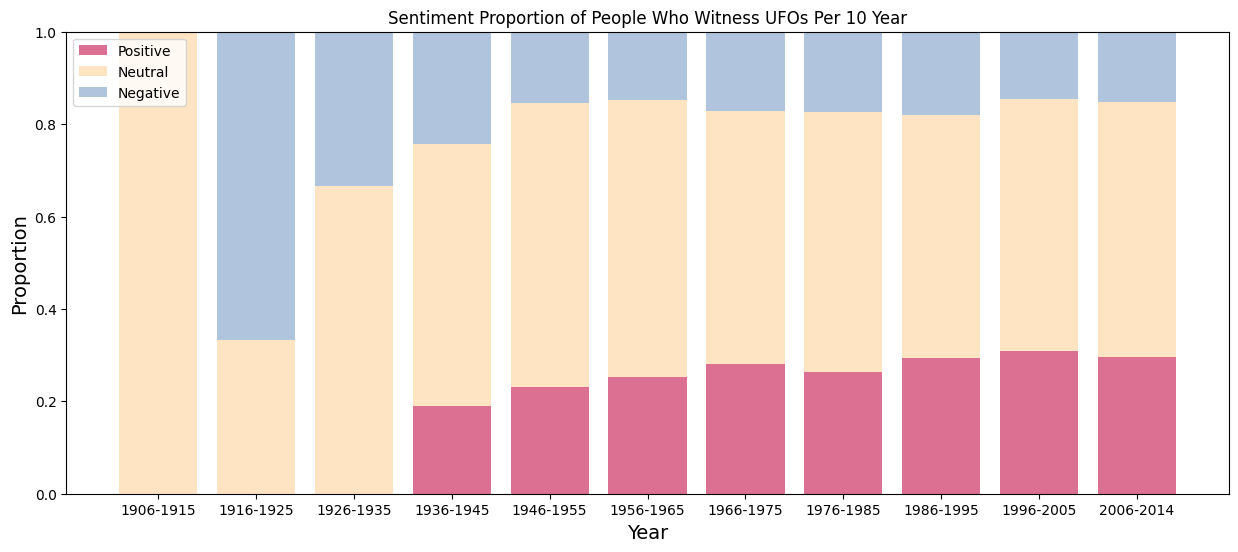

In [8]:
plt.figure(figsize=(15,6))
plt.bar(per10yr_stm['Sort_Year'], per10yr_stm['Positive'], label='Positive', color='palevioletred')
plt.bar(per10yr_stm['Sort_Year'], per10yr_stm['Neutral'], bottom=per10yr_stm['Positive'], label='Neutral', color='bisque')
plt.bar(per10yr_stm['Sort_Year'], per10yr_stm['Negative'], bottom=per10yr_stm['Positive']+per10yr_stm['Neutral'], label='Negative', color='lightsteelblue')
plt.legend()
plt.xlabel('Year', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.title("Sentiment Proportion of People Who Witness UFOs Per 10 Year")

Text(0.5, 1.0, 'Sentiment Proportion of People Who Witness UFOs Per 10 Year')

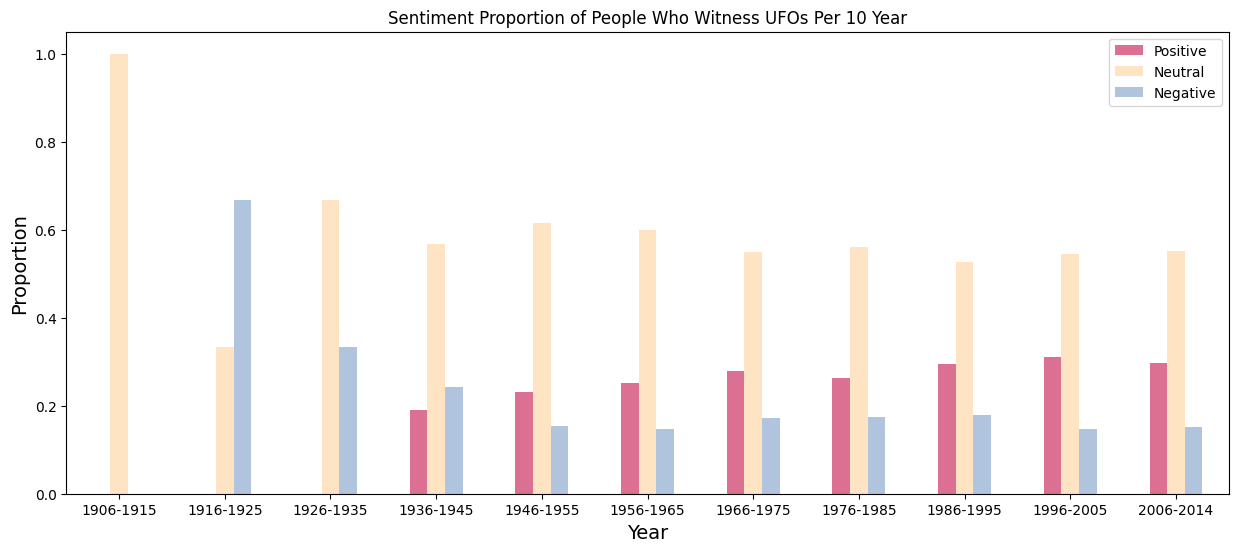

In [9]:
per10yr_stm.plot(kind='bar', figsize = (15,6), color={'Positive': 'palevioletred', 'Neutral': 'bisque', 'Negative': 'lightsteelblue'}).set_xticks(per10yr_stm.index, per10yr_stm.Sort_Year, rotation=0)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.title("Sentiment Proportion of People Who Witness UFOs Per 10 Year")

In [14]:
past_yr_10_count = ufo.groupby('Sort_Year')['Sort_Year'].value_counts().reset_index()
past_yr_10_count = past_yr_10_count.iloc[:5]

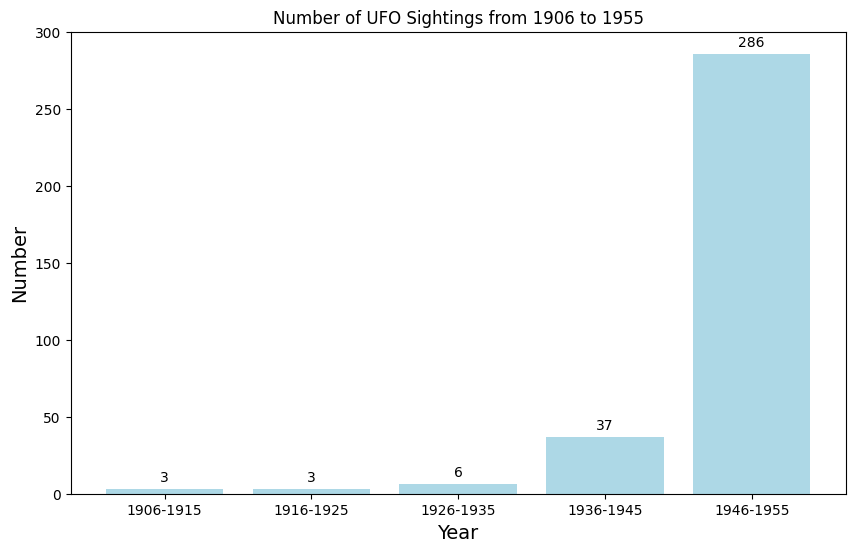

In [39]:
plt.figure(figsize=(10,6))
plt.bar(past_yr_10_count['Sort_Year'], past_yr_10_count['count'], color='lightblue')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number', fontsize=14)
plt.title("Number of UFO Sightings from 1906 to 1955")

for i, v in enumerate(past_yr_10_count['count']):
        plt.text(i, v+5 , str(v), ha = 'center')

In [16]:
shp_stm = ufo.groupby('UFO_shape')['Sentiment'].value_counts().reset_index()
shp_stm = shp_stm.pivot_table('count', index='UFO_shape', columns='Sentiment').fillna(0)

Text(0.5, 1.0, 'Number of Various Sentiment People Feel After Seeing UFOs in Different Shapes')

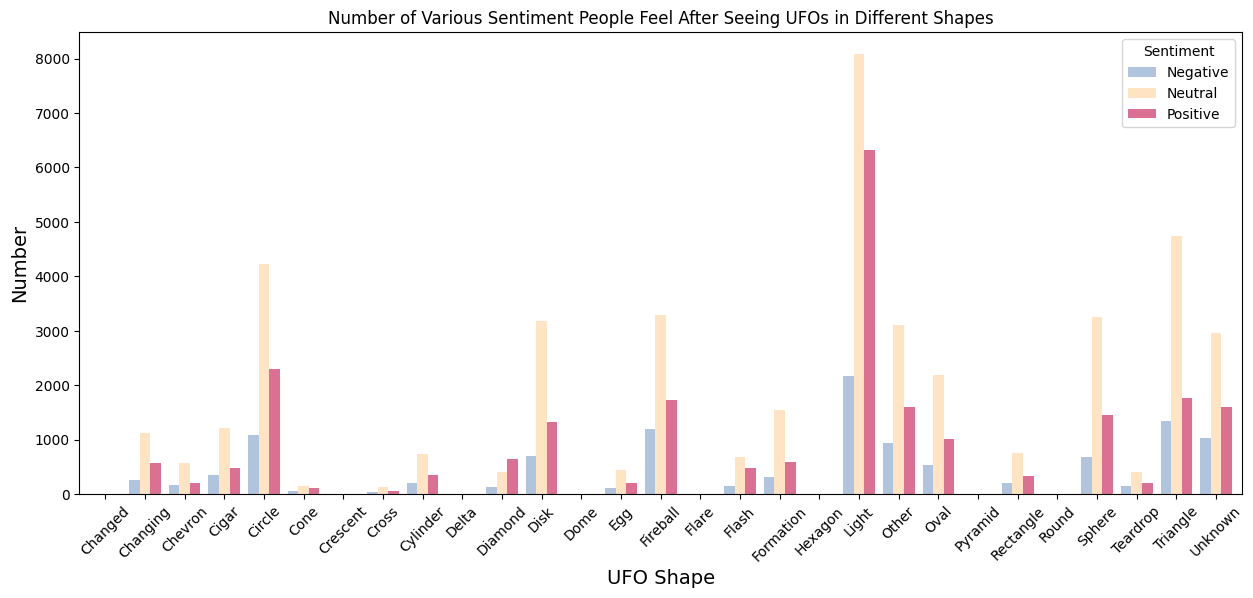

In [17]:
shp_stm.plot(kind='bar', figsize=(15,6), width=0.8, color=['lightsteelblue', 'bisque', 'palevioletred'])
plt.xticks(rotation=45)
plt.xlabel('UFO Shape', fontsize=14)
plt.ylabel('Number', fontsize=14)
plt.title("Number of Various Sentiment People Feel After Seeing UFOs in Different Shapes")

In [37]:
shp = ufo.groupby('UFO_shape')['UFO_shape'].value_counts().reset_index()

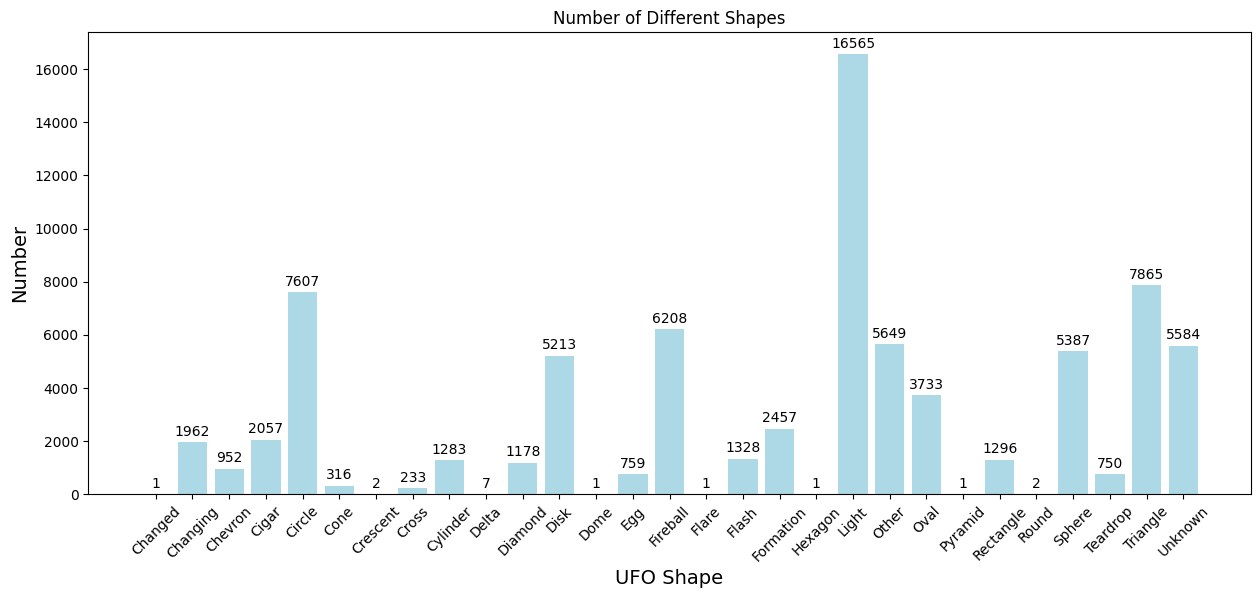

In [36]:
plt.figure(figsize=(15,6))
plt.bar(shp['UFO_shape'], shp['count'], color='lightblue')
plt.xticks(rotation=45)
plt.xlabel('UFO Shape', fontsize=14)
plt.ylabel('Number', fontsize=14)
plt.title("Number of Different Shapes")

for i, v in enumerate(shp['count']):
        plt.text(i, v+250 , str(v), ha = 'center')

In [18]:
shp_stm_pr = ufo.groupby('UFO_shape')['Sentiment'].agg([lambda x: (x == 'Positive').mean(), lambda y: (y == 'Neutral').mean(), lambda z: (z == 'Negative').mean()]).reset_index()
shp_stm_pr = shp_stm_pr.rename(columns={'<lambda_0>': 'Positive', '<lambda_1>': 'Neutral', '<lambda_2>': 'Negative'})

Text(0.5, 1.0, 'Sentiment Proportion of People Who Witness UFOs in Different Shapes')

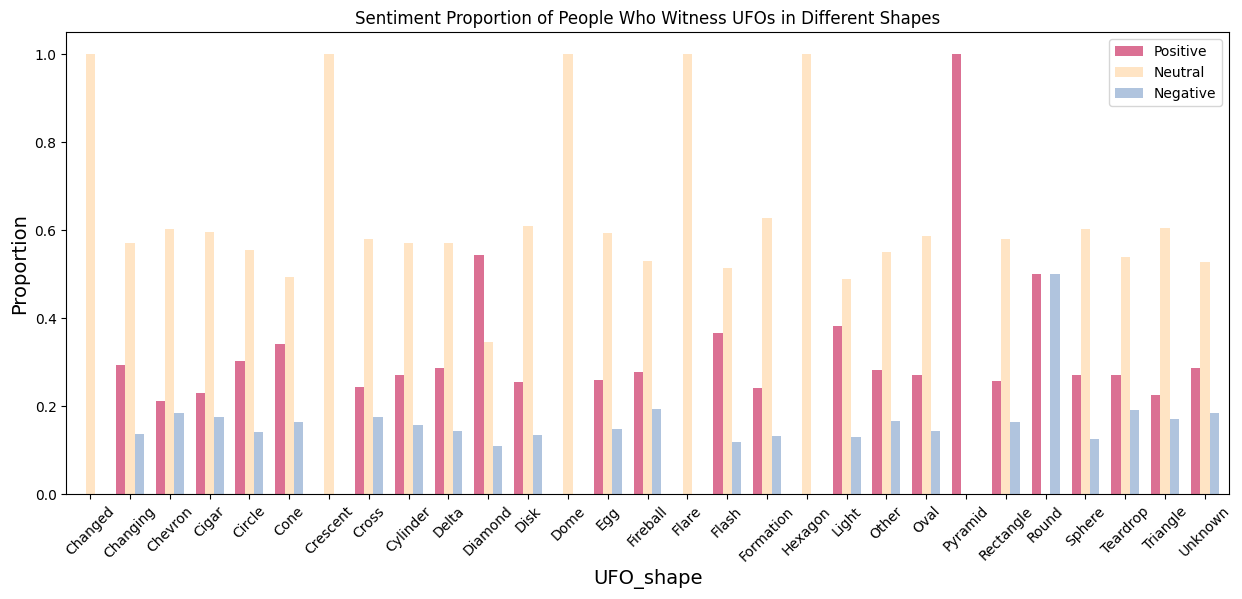

In [19]:
shp_stm_pr.plot(kind='bar', figsize = (15,6), width=0.7, color={'Positive': 'palevioletred', 'Neutral': 'bisque', 'Negative': 'lightsteelblue'}).set_xticks(shp_stm_pr.index, shp_stm_pr.UFO_shape, rotation=45)
plt.xlabel('UFO_shape', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.legend()
plt.title("Sentiment Proportion of People Who Witness UFOs in Different Shapes")

In [20]:
ssn_stm = ufo.groupby('Season')['Sentiment'].value_counts().reset_index()
ssn_stm = ssn_stm.pivot_table('count', index='Season', columns='Sentiment').fillna(0)

Text(0.5, 1.0, 'Number of Various Sentiment People Feel After Seeing UFOs in Different Season')

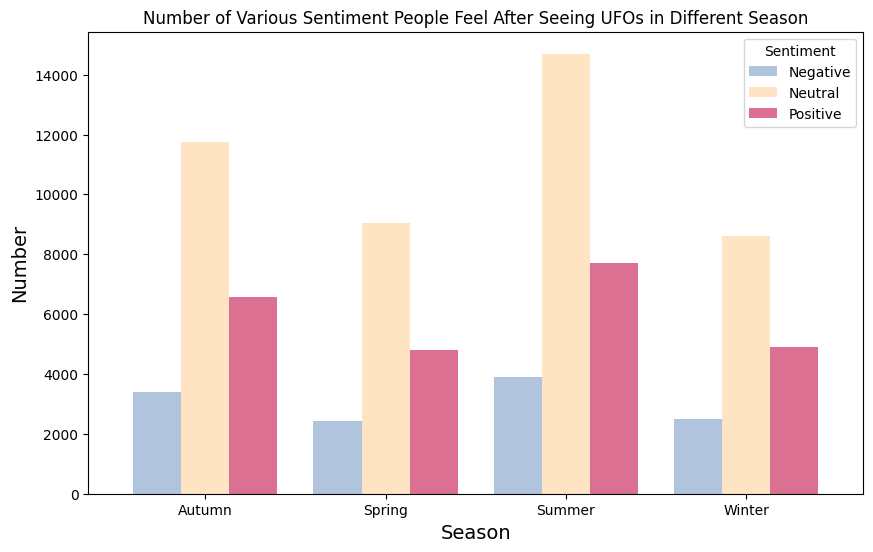

In [21]:
ssn_stm.plot(kind='bar', figsize=(10,6), width=0.8, color=['lightsteelblue', 'bisque', 'palevioletred'])
plt.xticks(rotation=0)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Number', fontsize=14)
plt.title("Number of Various Sentiment People Feel After Seeing UFOs in Different Season")

In [22]:
ssn_stm_pr = ufo.groupby('Season')['Sentiment'].agg([lambda x: (x == 'Positive').mean(), lambda y: (y == 'Neutral').mean(), lambda z: (z == 'Negative').mean()]).reset_index()
ssn_stm_pr = ssn_stm_pr.rename(columns={'<lambda_0>': 'Positive', '<lambda_1>': 'Neutral', '<lambda_2>': 'Negative'})

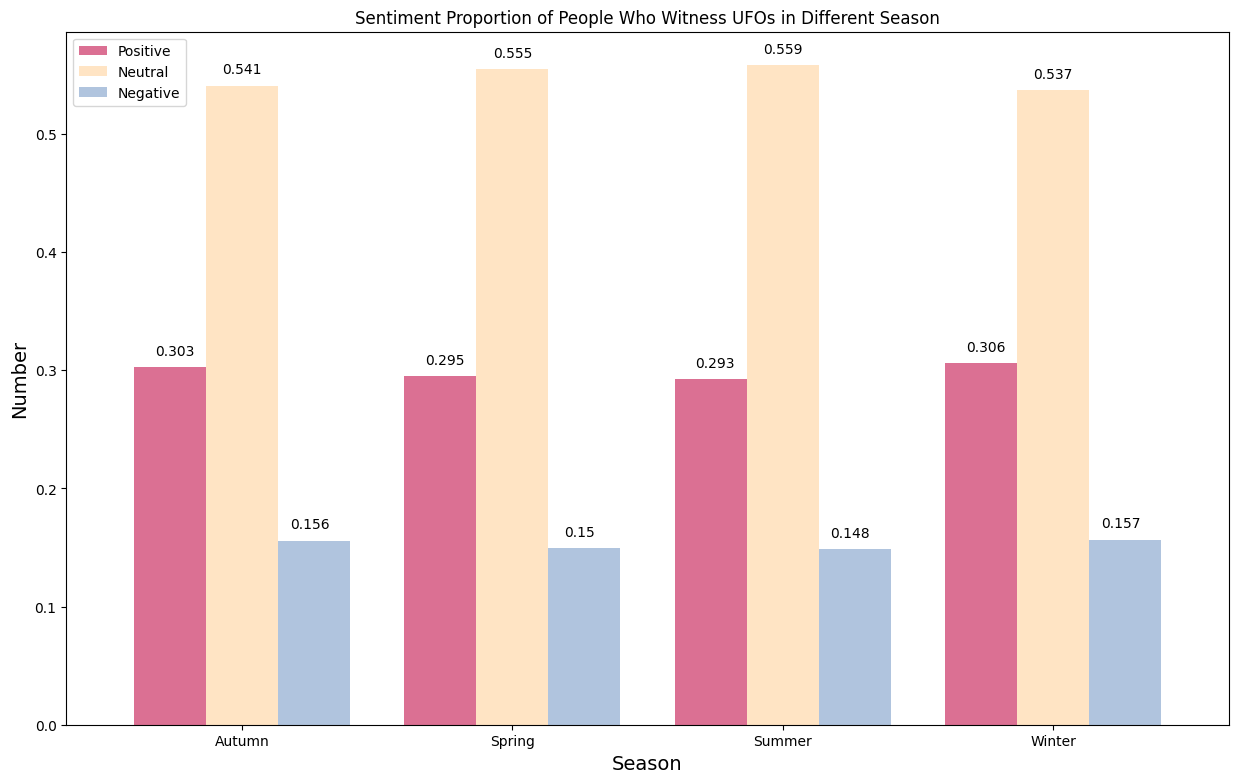

In [23]:

ssn_stm_pr.plot(kind='bar', figsize = (15,9), width=0.8, color={'Positive': 'palevioletred', 'Neutral': 'bisque', 'Negative': 'lightsteelblue'}).set_xticks(ssn_stm_pr.index, ssn_stm_pr['Season'], rotation=0)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Number', fontsize=14)
plt.title("Sentiment Proportion of People Who Witness UFOs in Different Season")
plt.legend(loc='upper left')
for i, v in enumerate(ssn_stm_pr['Positive']):
        plt.text(i-0.25, v +0.01, round(v, 3), ha = 'center')
for i, v in enumerate(ssn_stm_pr['Neutral']):
        plt.text(i, v +0.01, round(v, 3), ha = 'center')
for i, v in enumerate(ssn_stm_pr['Negative']):
        plt.text(i+0.25, v +0.01, round(v, 3), ha = 'center')

Text(0.5, 1.0, 'The Sentiments of People Who Witness UFOs')

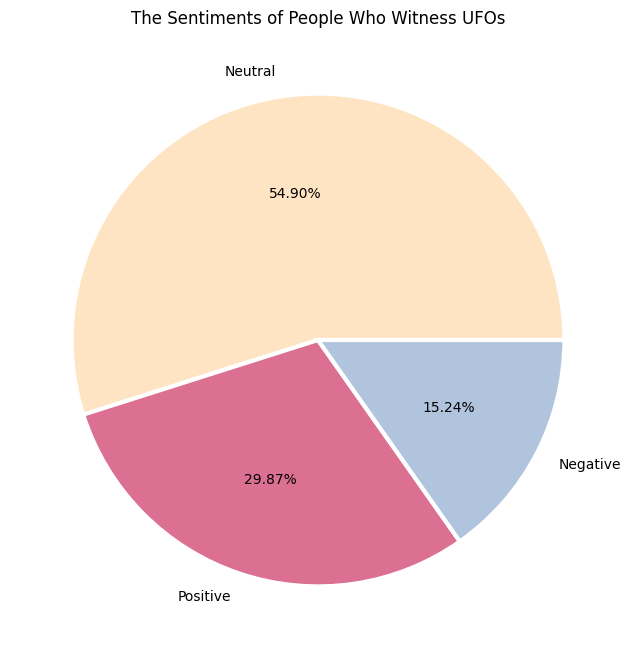

In [24]:
pi = ufo['Sentiment'].value_counts().reset_index()
plt.figure(figsize=(8,8))
plt.pie(pi['count'],  labels=pi['Sentiment'], autopct='%.2f%%', wedgeprops={'linewidth':3,'edgecolor':'w'}, colors=['bisque', 'palevioletred', 'lightsteelblue'])
plt.title("The Sentiments of People Who Witness UFOs")